# **`DECISION TREE REGRESSOR IMPLEMENTATION`**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
##California House Pricing Dataset
from sklearn.datasets import fetch_california_housing
california_df = fetch_california_housing()

In [3]:
california_df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
df = pd.DataFrame(california_df.data,columns=california_df.feature_names)

In [5]:
df["Target"] = california_df.target

In [6]:
## Taking samle data
df = df.sample(frac=0.25)

In [9]:
#Independent features
X = df.iloc[:,:-1]
#dependent features
y = df.iloc[:,-1]

In [10]:
X.shape , y.shape

((5160, 8), (5160,))

In [11]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
18977,3.8583,11.0,5.832591,1.023152,3570.0,3.178985,38.25,-122.01
11738,1.7375,52.0,4.812030,1.056391,523.0,1.966165,38.90,-121.07
1383,5.4496,19.0,6.233266,1.026369,1773.0,3.596349,37.99,-122.09
5786,3.0520,17.0,3.355781,1.019695,4116.0,2.614994,34.15,-118.24
13562,3.8292,36.0,6.694981,1.081081,604.0,2.332046,34.15,-117.28


In [12]:
#train test split
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test  = train_test_split(X,y,test_size=0.33,random_state=42)

In [13]:
X_train.shape , y_train.shape

((3457, 8), (3457,))

In [14]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()

In [15]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [16]:
y_pred = regressor.predict(X_test)

In [17]:
from sklearn.metrics import r2_score
score = r2_score(y_pred,y_test)

In [18]:
score

0.5407317736743583

In [22]:
## Hyperparameter Tuning
parameter = {
    "criterion" : ["squared_error", "friedman_mse","absolute_error","poisson"],
    "splitter" : ["best","random"],
    "max_depth" : [x for x in range(1,13)],
    "max_features" : ["auto","sqrt","log2"]
}
regressor = DecisionTreeRegressor()

In [23]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
regressorcv = GridSearchCV(regressor,param_grid=parameter,cv=2,scoring="neg_mean_squared_error")

In [24]:
regressorcv.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [25]:
regressorcv.best_params_

{'criterion': 'squared_error',
 'max_depth': 6,
 'max_features': 'auto',
 'splitter': 'best'}

In [26]:
y_pred = regressorcv.predict(X_test)

In [27]:
score = r2_score(y_pred,y_test)
score

0.43340383043065445

In [30]:
regressor = DecisionTreeRegressor(criterion="squared_error",max_depth=6,max_features="auto",splitter="best")

In [31]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=6, max_features='auto')

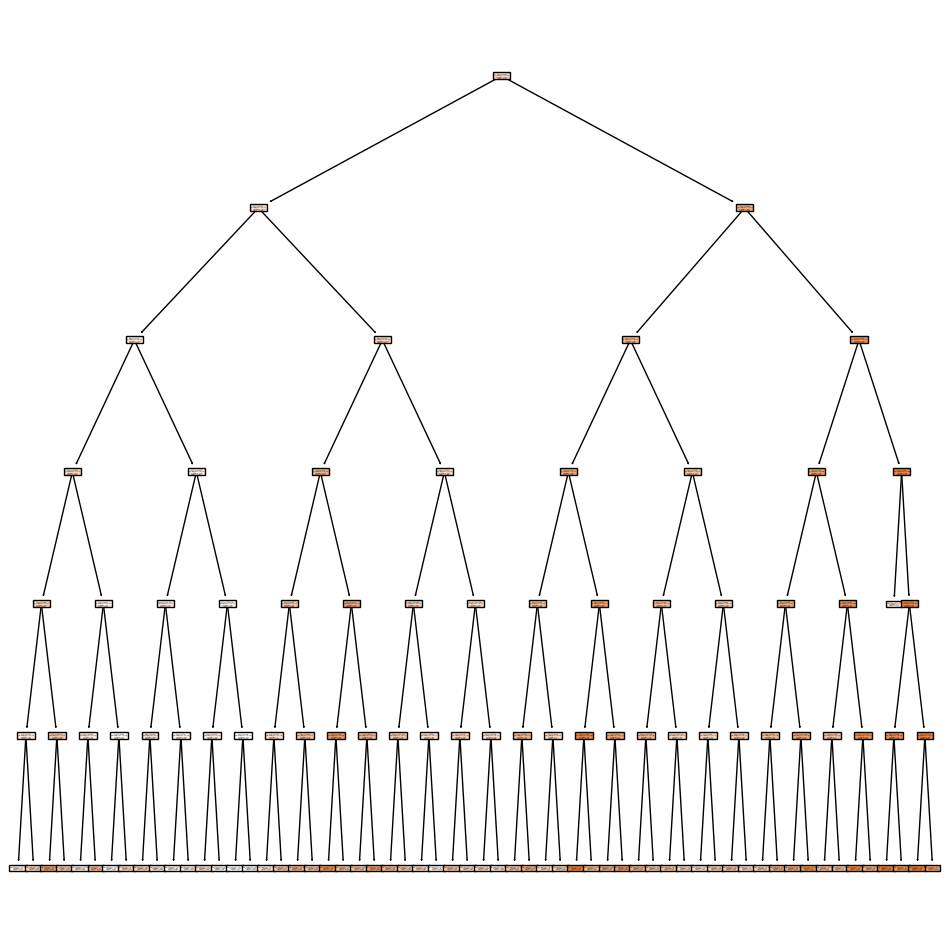

In [34]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(12,12))
tree.plot_tree(regressor,filled=True)
plt.show()

In [35]:
y_pred = regressor.predict(X_test)

In [36]:
r2_score(y_pred,y_test)

0.43309161742731084